# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
bitc_px = requests.get(btc_url).json()

# Fetch current ETH price
eth_px  = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = bitc_px['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_px['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15290.66
The current value of your 5.3 ETH is $2080.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares

my_agg = 200
my_spy = 50


In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [8]:
# Set current amount of shares into dataframe.
shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [9]:
# Format current date as ISO format
current_date = pd.Timestamp('2020-10-19', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# API barset setup
stock_tickers = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    end=current_date
).df

# Preview DataFrame
stock_tickers.index = stock_tickers.index.date
stock_tickers

AGG                                       SPY                  \
              open    high     low    close   volume    open    high     low   
2020-10-19  117.81  117.87  117.72  117.787  4231106  348.62  349.33  341.04   

                              
             close    volume  
2020-10-19  342.02  54462156

In [10]:
# Pick AGG and SPY close prices

agg_close_price = float(stock_tickers["AGG"]["close"])
spy_close_price = float(stock_tickers["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.787
Current SPY closing price: $342.02


In [11]:
# Compute the current value of shares
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17101.00
The current value of your 200 AGG shares is $23557.40


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
shares_dollar = my_spy_value + my_agg_value
crypto_dollar = my_btc_value + my_eth_value

rows = ["crypto", "shares"]
dollar_data = {
    "amount": [crypto_dollar, shares_dollar]
}
df_savings = pd.DataFrame(dollar_data, index=rows)

# Display savings DataFrame
display(df_savings)

,amount
crypto,17370.967
shares,40658.400


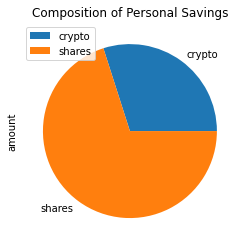

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = emergency_fund + shares_dollar + crypto_dollar
print(f"Total savings ${total_savings:0.2f}")

# Created if conditional statement in order to check for sufficient savings. 
if total_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have met your financial goal.")
else:
    print("Unfortunately, You are ${emergency_fund-total_amount_savings} from your financial goal.")


Total savings $94029.37
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.

start_date = pd.Timestamp('2015-10-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-19', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
weights = [.40, .60]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                       SPY          \
              open     high     low   close   volume    open    high   
2015-10-19  109.78  109.895  109.65  109.85  1289942  202.50  203.37   
2015-10-20  109.64  109.780  109.55  109.65  1672562  202.85  203.84   
2015-10-21  109.73  109.950  109.73  109.89  1119723  203.61  203.79   
2015-10-22  109.90  110.050  109.83  109.94  1817244  202.98  205.51   
2015-10-23  109.79  109.790  109.69  109.74  1344632  207.25  207.95   

                                         
                 low   close     volume  
2015-10-19  202.1300  203.33   61255929  
2015-10-20  202.5471  203.07   60081395  
2015-10-21  201.6500  201.82   83704739  
2015-10-22  202.8100  205.22  121670959  
2015-10-23  206.3000  207.51  103135843

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-19  109.78  109.895  109.65  109.85  1289942          NaN  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   
2015-10-23  109.79  109.790  109.69  109.74  1344632    -0.001819  207.25   

                                                              
              high       low   close     volume daily_return  
2015-10-19  203.37  202.1300  203.33   61255929          NaN  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847  
2015-10-23  207.95  206.3000  207.51  103135843     0.011159

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000022,0.995917,0.995507,0.998164,1.009808,1.005888,1.009850,1.012224,0.995265,1.001644,...,1.006500,0.997080,0.993395,1.001018,1.008605,0.998907,1.000832,0.993027,1.005141,0.994516
2,1.006122,0.984535,0.987264,1.000706,1.017363,1.011010,1.000019,1.006993,0.991181,0.996647,...,1.006698,0.994468,0.987116,1.012824,1.007243,1.003240,1.003026,0.999915,0.991539,1.000274
3,1.012284,0.982742,0.992159,0.983565,1.014082,1.023831,0.999000,0.987792,0.991169,0.992376,...,0.996019,1.002114,0.989121,1.010527,1.012737,1.003500,1.004792,0.987490,0.986770,1.010655
4,1.016000,0.989509,0.999984,0.981065,1.014727,1.018780,1.004146,0.990906,1.003873,0.988371,...,0.986214,0.994574,0.986607,1.015762,1.010051,1.010641,1.010899,0.987056,0.983315,1.005925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.204301,11.352219,14.105148,3.826596,12.117441,2.556664,13.588997,5.825942,4.435621,15.306783,...,11.639834,15.178861,9.149777,4.624991,10.501431,7.314018,4.039193,16.808776,4.587723,22.146082
7557,20.411637,11.377599,14.115756,3.841377,12.074731,2.529872,13.404275,5.782868,4.412684,15.291358,...,11.541249,15.299053,9.172531,4.616192,10.606488,7.321389,4.044712,16.884017,4.660976,22.188749
7558,20.577951,11.260616,13.894359,3.878124,12.086537,2.529443,13.336539,5.860590,4.452776,15.136939,...,11.565338,15.091346,9.118282,4.607216,10.640153,7.351671,4.020657,16.740742,4.646680,22.264182
7559,20.495284,11.365948,13.865474,3.883471,12.100760,2.565654,13.352709,5.915003,4.436264,15.084911,...,11.511556,14.879932,9.213876,4.625951,10.674322,7.350325,4.033562,16.658529,4.626986,22.245610


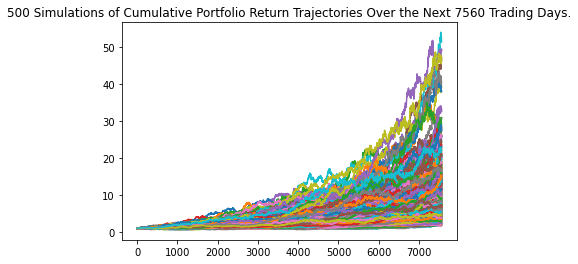

In [20]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

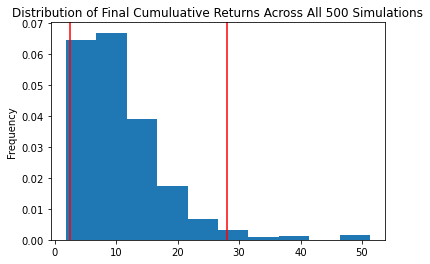

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean             10.810298
std               7.226580
min               1.784685
25%               5.759482
50%               8.968178
75%              13.854006
max              51.326155
95% CI Lower      2.509104
95% CI Upper     28.068354
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50182.08 and $561367.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $75273.12 and $842050.62


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Changed weights to .20 and .80. 

MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*5
)



In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyears.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-19  109.78  109.895  109.65  109.85  1289942          NaN  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   
2015-10-23  109.79  109.790  109.69  109.74  1344632    -0.001819  207.25   

                                                              
              high       low   close     volume daily_return  
2015-10-19  203.37  202.1300  203.33   61255929          NaN  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847  
2015-10-23  207.95  206.3000  207.51  103135843     0.011159

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

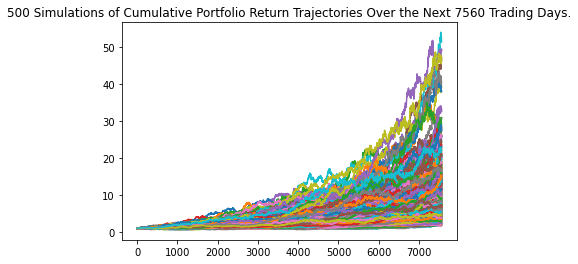

In [27]:
# Plot simulation outcomes
MC_fiveyears.calc_cumulative_return()
line_plot = MC_thirtyyear.plot_simulation()

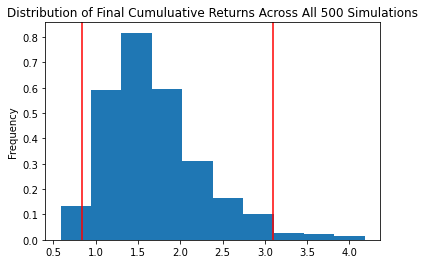

In [28]:
# Plot probability distribution and confidence intervals

New_dist_plot = MC_fiveyears.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
tbl_2

count           500.000000
mean              1.695710
std               0.582742
min               0.584336
25%               1.286343
50%               1.601809
75%               2.003701
max               4.183449
95% CI Lower      0.833155
95% CI Upper      3.091795
Name: 1260, dtype: float64

In [30]:
# Set initial investment
initial_investment2 = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_five = round(tbl[8]*10000,2)
ci_upper_five = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $25091.04 and $280683.54


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Changed weights to .90 and .10.

MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.90, .10],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_ten_years.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-19  109.78  109.895  109.65  109.85  1289942          NaN  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   
2015-10-23  109.79  109.790  109.69  109.74  1344632    -0.001819  207.25   

                                                              
              high       low   close     volume daily_return  
2015-10-19  203.37  202.1300  203.33   61255929          NaN  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847  
2015-10-23  207.95  206.3000  207.51  103135843     0.011159

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998745,1.000859,1.001177,1.000567,1.001681,1.000924,1.000792,0.999737,1.002905,1.003577,...,1.000355,1.001182,0.992730,1.003267,1.003991,0.997454,1.005178,1.001609,0.997435,0.999875
2,1.003797,1.001307,0.998800,1.001954,1.004132,1.004377,0.999519,0.995555,1.009417,1.001904,...,1.000574,0.999634,0.995987,1.008228,1.006260,0.997909,1.000713,1.003312,1.001701,1.000967
3,1.003453,0.997311,0.994470,1.002435,1.008146,1.004550,0.995667,0.994984,1.011772,1.002612,...,1.003565,0.999232,0.996363,1.008568,1.011187,0.994643,1.001583,1.002552,1.002852,0.999699
4,1.008084,0.994469,0.994126,1.001240,1.006966,1.009072,0.999541,0.997375,1.009814,1.002372,...,0.999521,0.998313,0.995196,1.011629,1.002699,0.995711,1.002070,1.003814,1.007298,0.996721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.099910,1.605927,1.539437,1.221584,1.658151,1.400624,1.583297,1.153711,1.162137,1.337292,...,1.451477,1.359312,1.071476,1.268385,1.551839,1.480432,1.187531,1.138236,1.751098,1.500927
2517,1.097071,1.604532,1.551461,1.220097,1.661949,1.397489,1.579483,1.154003,1.158511,1.335555,...,1.449413,1.354215,1.073170,1.271891,1.551600,1.480461,1.187571,1.137419,1.750279,1.503177
2518,1.096842,1.605872,1.553839,1.221070,1.657633,1.393955,1.578364,1.151762,1.153949,1.335508,...,1.454693,1.350259,1.075567,1.273134,1.550709,1.478332,1.185880,1.134153,1.753987,1.499039
2519,1.094851,1.605039,1.553772,1.219798,1.660501,1.392340,1.580266,1.153127,1.153809,1.335274,...,1.462343,1.350031,1.079580,1.276035,1.548960,1.480125,1.177908,1.129299,1.745415,1.506284


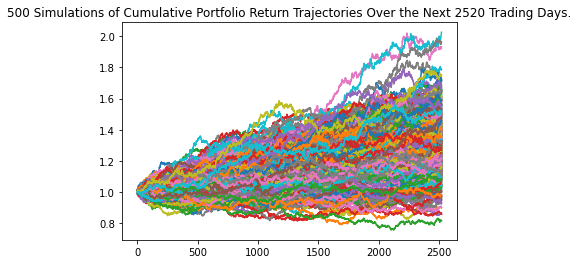

In [33]:
# Plot simulation outcomes
line_plot = MC_ten_years.plot_simulation()

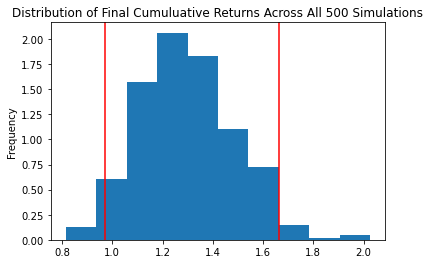

In [34]:
# Plot probability distribution and confidence intervals
New_dist_plot10y = MC_ten_years.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3 = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
tbl_3

count           500.000000
mean              1.295900
std               0.189544
min               0.814655
25%               1.161048
50%               1.282775
75%               1.418127
max               2.026377
95% CI Lower      0.969690
95% CI Upper      1.661780
Name: 2520, dtype: float64

In [36]:
# Set initial investment
initial_investment3 = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*100000,2)
ci_upper_ten = round(tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $250910.41 and $2806835.41
